# Analysis of a10.csv dataset



In [ ]:
import pandas as pd

In [ ]:
# load dataset

url = "https://raw.githubusercontent.com/alexisperrier/emines_ts/master/data/otexts/a10.csv"

df = pd.read_csv(url)


In [ ]:
print(df.shape)
df.head()

(204, 2)


,index,value
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


# Transformer en pd.Series avec les dates pour index

In [ ]:
from dateutil import parser

df['date'] = df['index'].apply(lambda d : parser.parse(d))

df

,index,value,date
0,1991 Jul,3.526591,1991-07-26
1,1991 Aug,3.180891,1991-08-26
2,1991 Sep,3.252221,1991-09-26
3,1991 Oct,3.611003,1991-10-26
4,1991 Nov,3.565869,1991-11-26
...,...,...,...
199,2008 Feb,21.654285,2008-02-26
200,2008 Mar,18.264945,2008-03-26
201,2008 Apr,23.107677,2008-04-26
202,2008 May,22.912510,2008-05-26


In [ ]:

ts = pd.Series(data = df.value.values, index = df['date'])
ts


date
1991-07-26     3.526591
1991-08-26     3.180891
1991-09-26     3.252221
1991-10-26     3.611003
1991-11-26     3.565869
                ...    
2008-02-26    21.654285
2008-03-26    18.264945
2008-04-26    23.107677
2008-05-26    22.912510
2008-06-26    19.431740
Length: 204, dtype: float64

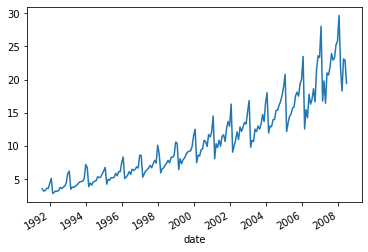

In [ ]:
ts.plot()

la p-value est 0.11665341686469871 >> 0.05 donc on peut pas rejeter H0: a unit root is present in a time series sample  
la p-value est 0.1 > 0.05 donc on peut pas rejeter H0: time series is stationary 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


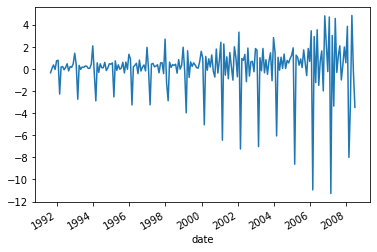

In [ ]:
d1 = ts.diff()

d1 = d1[~d1.isna()]

d1.plot()


res = adfuller(d1)

print(f"la p-value est {res[1]} >> 0.05 donc on peut pas rejeter H0: a unit root is present in a time series sample  ")

# => pas stationnaire avec adfuller

res = kpss(d1)
print(f"la p-value est {res[1]} > 0.05 donc on peut pas rejeter H0: time series is stationary ")

# => stationnaire avec KPSS

# tester si c'est un white noise: ljung box



In [ ]:
import statsmodels.api as sm
res = sm.stats.acorr_ljungbox(ts, lags=[5])
print(f"Resultat du test Ljung-Box p-value: {  res[1][0] }")

Resultat du test Ljung-Box p-value: 3.1671408080658715e-167


p-value << 0.5 donc on rejete H0: The data are independently distributed 


Donc ce ne peut etre un white noise

ce qui est evident quand on regarde simplement la serie 

# Stationarité ?

Pas besoin de faire un test pour voir que 

1. la moyenne dépend du temps.
2. la variance aussi

Mais verifions que le test ADF confirme que la serie n'est pas stationnaire.

Si p-value >> 0.5 alors il y a une unit root et la serie n'est pas stationnaire



In [ ]:
from statsmodels.tsa.stattools import adfuller

res = adfuller(ts)

print(f"la p-value est {res[1]} >>0.05 donc on ne peut rejeter H0: a unit root is present in a time series sample  ")

la p-value est 1.0 >>0.05 donc on ne peut rejeter H0: a unit root is present in a time series sample  


# KPSS Test de stationarité

https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/ 

the null hypothesis of the KPSS test is that the series is stationary.

In [ ]:
from statsmodels.tsa.stattools import kpss
res = kpss(ts)
print(f"la p-value est {res[1]} < 0.05 donc on peut rejeter H0: time series is stationary ")

la p-value est 0.01 < 0.05 donc on peut rejeter H0: time series is stationary 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Les 2 tests (ADF et KPSS) confirme que la serie n'est pas stationnaire

# Temperature





In [ ]:
url = "https://raw.githubusercontent.com/alexisperrier/emines_ts/master/data/Historical%20Hourly%20Weather%20Data%202012-2017/temperature.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,San Antonio,Dallas,Houston,Kansas City,Minneapolis,Saint Louis,Chicago,Nashville,Indianapolis,Atlanta,Detroit,Jacksonville,Charlotte,Miami,Pittsburgh,Toronto,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,289.290000,289.740000,288.270000,289.980000,286.870000,286.180000,284.010000,287.410000,283.850000,294.030000,284.030000,298.170000,288.650000,299.720000,281.000000,286.260000,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,289.303649,289.762974,288.297576,289.997635,286.893636,286.185246,284.054691,287.421360,283.889394,294.035341,284.069789,298.205230,288.650172,299.732518,281.024767,286.262541,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,289.338497,289.830767,288.334343,290.038151,286.951401,286.199194,284.177412,287.454637,283.941919,294.049702,284.173965,298.299595,288.650582,299.766579,281.088319,286.269518,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,289.373345,289.898560,288.371111,290.078666,287.009166,286.213142,284.300133,287.487914,283.994444,294.064063,284.278140,298.393961,288.650991,299.800641,281.151870,286.276496,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [ ]:
from dateutil import parser
df['datetime'] = df['datetime'].apply(lambda d : parser.parse(d))

df['datetime']

0       2012-10-01 12:00:00
1       2012-10-01 13:00:00
2       2012-10-01 14:00:00
3       2012-10-01 15:00:00
4       2012-10-01 16:00:00
                ...        
45248   2017-11-29 20:00:00
45249   2017-11-29 21:00:00
45250   2017-11-29 22:00:00
45251   2017-11-29 23:00:00
45252   2017-11-30 00:00:00
Name: datetime, Length: 45253, dtype: datetime64[ns]

In [ ]:
ts = pd.Series(data = df.Boston.values, index = df['datetime'])

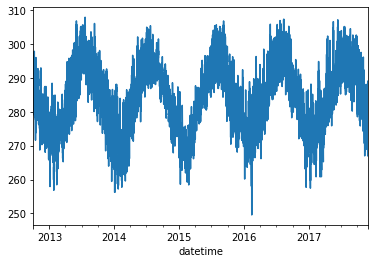

In [ ]:
ts.plot()

In [ ]:
ts = ts[~ts.isna()]

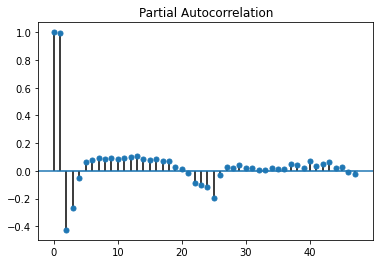

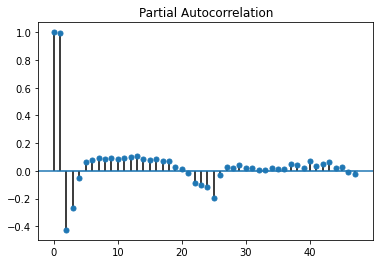

In [ ]:
import statsmodels.tsa.api as smt
smt.graphics.plot_pacf(ts.values)


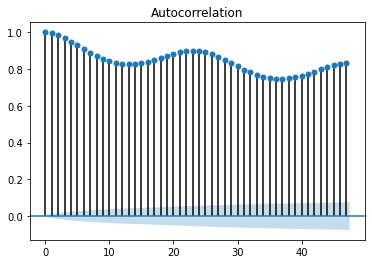

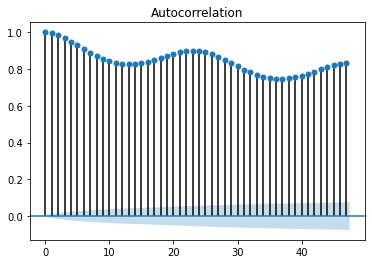

In [ ]:
smt.graphics.plot_acf(ts.values)

# Differenciation

https://machinelearningmastery.com/difference-time-series-dataset-python/


In [ ]:
?ts.diff()

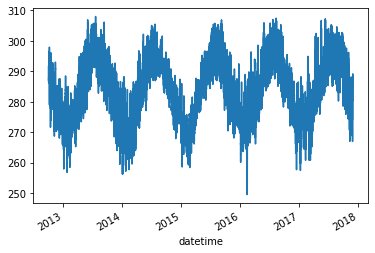

In [ ]:
ts.plot()

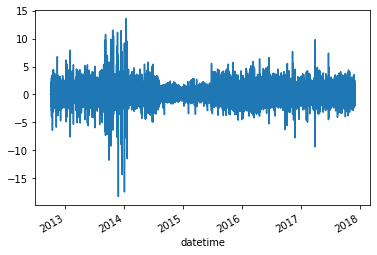

In [ ]:
ts.diff().plot()

In [ ]:
d1 = ts.diff()
d1 = d1[~d1.isna()]

In [ ]:
d1

datetime
2012-10-01 14:00:00    0.016092
2012-10-01 15:00:00    0.045579
2012-10-01 16:00:00    0.045579
2012-10-01 17:00:00    0.045579
2012-10-01 18:00:00    0.045579
                         ...   
2017-11-29 20:00:00   -1.080000
2017-11-29 21:00:00   -2.060000
2017-11-29 22:00:00   -2.080000
2017-11-29 23:00:00   -1.770000
2017-11-30 00:00:00   -1.520000
Length: 45249, dtype: float64

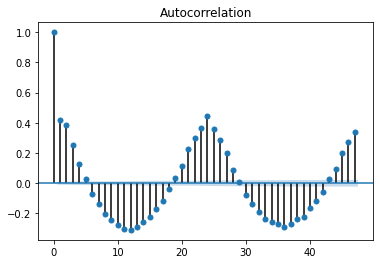

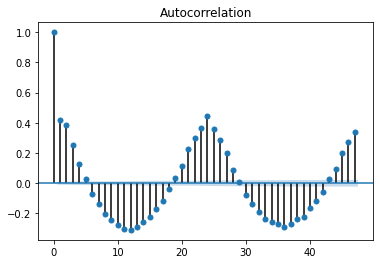

In [ ]:
smt.graphics.plot_acf(d1.values)

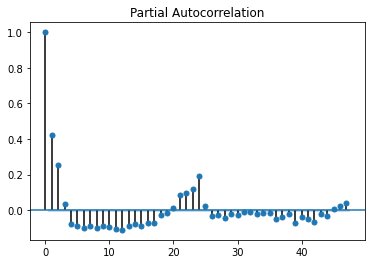

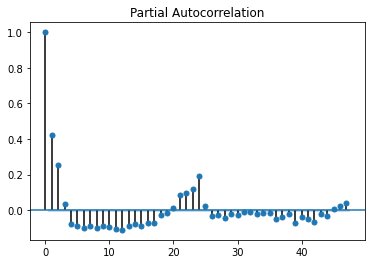

In [ ]:
smt.graphics.plot_pacf(d1.values)

In [ ]:
res = adfuller(d1)

print(f"la p-value est {res[1]} << 0.05 donc on peut rejeter H0: a unit root is present in a time series sample  ")

# => stationnaire avec adfuller


res = kpss(d1)
print(f"la p-value est {res[1]} > 0.05 donc on peut pas rejeter H0: time series is stationary ")

la p-value est 0.0 << 0.05 donc on peut rejeter H0: a unit root is present in a time series sample  
la p-value est 0.1 > 0.05 donc on peut pas rejeter H0: time series is stationary 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


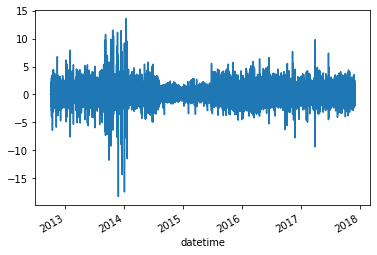

In [ ]:
d1.plot()

la p-value est 0.0 << 0.05 donc on peut rejeter H0: a unit root is present in a time series sample  
la p-value est 0.1 > 0.05 donc on peut pas rejeter H0: time series is stationary 


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


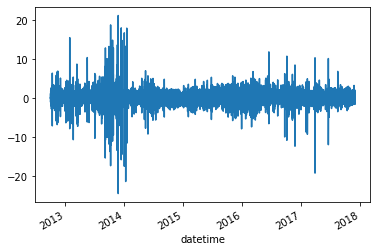

In [ ]:
d2 = d1.diff()
d2 = d2[~d2.isna()]

res = adfuller(d2)

print(f"la p-value est {res[1]} << 0.05 donc on peut rejeter H0: a unit root is present in a time series sample  ")

# => stationnaire avec adfuller


res = kpss(d2)
print(f"la p-value est {res[1]} > 0.05 donc on peut pas rejeter H0: time series is stationary ")
d2.plot()